# Support Vector Machines
Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection. The main functions used here are SVC for classfication and SVR for regression.

- [svm.SVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)
- [svm.SVR](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html#sklearn.svm.SVR)

In [83]:
from sklearn import svm, datasets
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Classification with SVMs

A classification example on a toy data set. Fitting the model and predicting.

In [47]:
X = [[0, 0], [1, 1]]
y = [0, 1]
clf = svm.SVC()
clf.fit(X, y)
clf.predict([[2., 2.]])

array([1])

Identifying the support vectors from all the training points.

In [48]:
# get support vectors
print(clf.support_vectors_)
# get indices of support vectors
print(clf.support_)

[[ 0.  0.]
 [ 1.  1.]]
[0 1]


### Hand written digit recognition (two classes)
Working on the same problem as in the logistic regression notebook.

In [49]:
digits = datasets.load_digits()
print(digits.data.shape)
print(digits.target.shape)
X, y = digits.data, digits.target
X = StandardScaler().fit_transform(X)
# classify small against large digits
y = (y > 4).astype(np.int)

(1797, 64)
(1797,)


### Fitting the SVM classifier
Fitting the SVM model and predicting on the training set.

In [50]:
clf_digits = svm.SVC()
clf_digits.fit(X, y)
pred = clf_digits.predict(X)

### Confusion Matrix
Validating the model using the accuracy computed on the training set using the confusion matrix.

In [51]:
cmat = confusion_matrix(y, pred)
print(cmat)
accuracy = 100*cmat.diagonal().sum()/cmat.sum()
print("Accuracy on the training set:", round(accuracy, 2), "%")

[[895   6]
 [  6 890]]
Accuracy on the training set: 99.33 %


### Multi-class classification
For multi class problem, we have to train multiple SVM models since there is no method to incorporate multiple classes within the same SVM model. It is possible to handle this problem in many ways. One is to train $n\times(n-1)/2$ models for each combination of the classes. This is called "One vs One" or "ovo". The other is to train $n$ models to check whether an observation belongs to each class. This is called "One vs Rest" or "ovr".

In [52]:
X = [[0], [1], [2], [3]]
Y = [0, 1, 2, 3]
clf = svm.SVC(decision_function_shape='ovo')
clf.fit(X, Y) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [53]:
dec = clf.decision_function([[1]])
dec

array([[-0.63212056,  0.        ,  0.3495638 ,  0.63212056,  0.98168436,
         0.3495638 ]])

In [54]:
clf.decision_function_shape = "ovr"
dec = clf.decision_function([[1]])
dec.shape[1] # 4 classes

4

### Hand written digit recognition (multiple classes)

#### One vs One Strategy

In [55]:
X, y = digits.data, digits.target
X = StandardScaler().fit_transform(X)
clf_digit_ovo = svm.SVC(decision_function_shape='ovo')
clf_digit_ovo.fit(X, y)
pred = clf_digit_ovo.predict(X)

##### Confusion Matrix and accuracy on training data

In [56]:
cmat = confusion_matrix(y, pred)
print(cmat)
accuracy = 100*cmat.diagonal().sum()/cmat.sum()
print("Accuracy on the training set:", round(accuracy, 2), "%")

[[178   0   0   0   0   0   0   0   0   0]
 [  0 182   0   0   0   0   0   0   0   0]
 [  0   0 177   0   0   0   0   0   0   0]
 [  0   0   0 183   0   0   0   0   0   0]
 [  0   0   0   0 181   0   0   0   0   0]
 [  0   0   0   0   0 181   0   0   0   1]
 [  0   0   0   0   0   0 181   0   0   0]
 [  0   0   0   0   0   0   0 178   0   1]
 [  0   2   0   0   0   0   0   0 172   0]
 [  0   0   0   0   0   0   0   0   2 178]]
Accuracy on the training set: 99.67 %


#### One vs Rest Srategy

In [57]:
clf_digit_ovr = svm.SVC(decision_function_shape='ovr')
clf_digit_ovr.fit(X, y)
pred = clf_digit_ovr.predict(X)
cmat = confusion_matrix(y, pred)
print(cmat)
accuracy = 100*cmat.diagonal().sum()/cmat.sum()
print("Accuracy on the training set:", round(accuracy, 2), "%")

[[178   0   0   0   0   0   0   0   0   0]
 [  0 182   0   0   0   0   0   0   0   0]
 [  0   0 177   0   0   0   0   0   0   0]
 [  0   0   0 183   0   0   0   0   0   0]
 [  0   0   0   0 181   0   0   0   0   0]
 [  0   0   0   0   0 181   0   0   0   1]
 [  0   0   0   0   0   0 181   0   0   0]
 [  0   0   0   0   0   0   0 178   0   1]
 [  0   2   0   0   0   0   0   0 172   0]
 [  0   0   0   0   0   0   0   0   2 178]]
Accuracy on the training set: 99.67 %


### Trying out different kernels
We can also try out different kernels to see which one performs the best. The four possible kernels are linear, polynomial, sigmoid and radial basis function kernel (rbf).

In [58]:
def svm_kernel(X=X,y=y,kern="rbf"):
    clf_digit_ovr = svm.SVC(decision_function_shape='ovr', kernel = kern)
    clf_digit_ovr.fit(X, y)
    pred = clf_digit_ovr.predict(X)
    cmat = confusion_matrix(y, pred)
    accuracy = 100*cmat.diagonal().sum()/cmat.sum()
    print("Accuracy on the training set with", kern, "kernel:", round(accuracy, 2), "%")

svm_kernel()
svm_kernel(kern = "linear")
svm_kernel(kern = "poly")
svm_kernel(kern = "sigmoid")

Accuracy on the training set with rbf kernel: 99.67 %
Accuracy on the training set with linear kernel: 100.0 %
Accuracy on the training set with poly kernel: 98.11 %
Accuracy on the training set with sigmoid kernel: 95.77 %


## Regression with SVMs
Trying to perform regression on the diabetes data set that was used for linear regression. The MSPE for multiple linear regression was 2004.57. We will see how SVM performs on the same data using different kernels.

In [59]:
diabetes = datasets.load_diabetes()
diabetes_X_train = diabetes.data[:-20]
diabetes_X_test = diabetes.data[-20:]
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

for kern in ["rbf", "linear", "poly", "sigmoid"]:
    svm_reg = svm.SVR(kernel = kern)
    svm_reg.fit(diabetes_X_train,diabetes_y_train)
    pred = svm_reg.predict(diabetes_X_test)
    print("MSPE with", kern, "kernel:", mean_squared_error(diabetes_y_test, pred))

MSPE with rbf kernel: 5027.67650771
MSPE with linear kernel: 4887.89694401
MSPE with poly kernel: 5065.24991432
MSPE with sigmoid kernel: 5046.30792257


The SVM performs worse than linear regression. Let's look at another case where the power of SVM regression can be seen.

#### Toy example of 1D regression using linear, polynomial and RBF kernels

##### Generating sample data

We will generate data randomly from a cubic function and then add some noise to the data. We expect the polynomial kernel to perform the best here.

In [60]:
np.random.seed(2017-12-28)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = (X**3).ravel()
y[::5] += 3 * (5 - np.random.rand(8))

##### Fitting the SVR models using different kernels

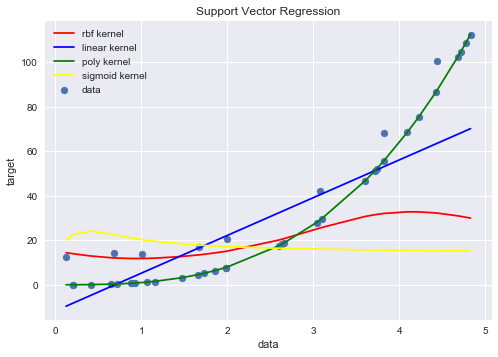

In [61]:
plt.scatter(X,y, label = "data")
kernels = ["rbf", "linear", "poly", "sigmoid"]
colors = ["red", "blue", "green", "yellow"]
for kern, col in zip(kernels, colors):
    svr_reg = svm.SVR(kernel = kern)
    svr_reg.fit(X,y)
    pred = svr_reg.predict(X)
    plt.plot(X, pred, color = col, label = kern + " kernel")

plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()